# ML Project 1

## Importing Libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
import os 
os.chdir("C:/Users/ozero/ÖNEMLİ ÇALIŞMALAR")

## Data Collection and Data Processing

In [12]:
project_1 = pd.read_csv("Copy of sonar data.csv", header = None)

+ `header = None` olarak ayarlanmasaydı, veri setinde sütunların başlığı olmadığından dolayı ilk satır, sütun başlıkları olarak alınırdı. 

In [13]:
project_1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


+ Bu veri seti, deniz altından giden ve gelen sinyallere ait sayısal verileri içermekte ve bu sinyaller sonucu tespit edilen nesnenin `R = Rock (Kaya)` veya `M = Mine (Mayın)` olduğunun sınıflandırmasını göstermektedir. 

In [14]:
#.info()
project_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [15]:
#.shape
project_1.shape

(208, 61)

In [16]:
#.columns
project_1.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [20]:
#.unique() ve .nunique()
print(project_1[60].nunique())
print(project_1[60].unique())

2
['R' 'M']


In [21]:
#.isnull().sum()
project_1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

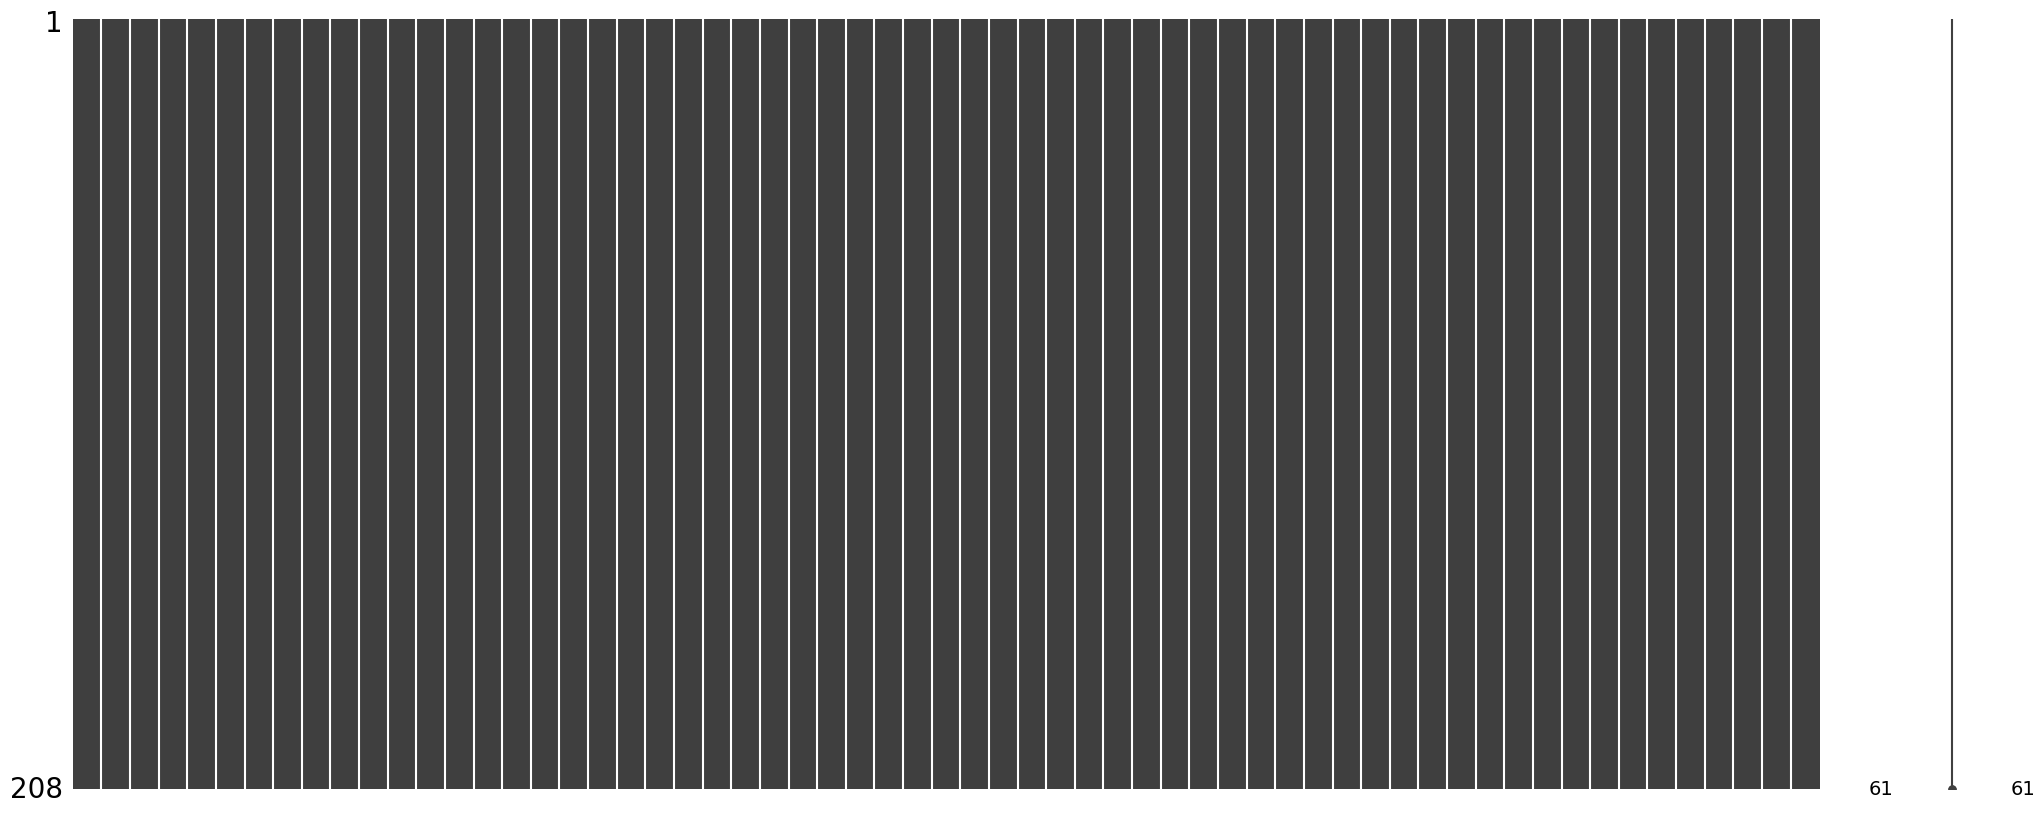

In [22]:
#.msno().matrix()
import missingno as msno
fig = msno.matrix(project_1)

In [24]:
#.duplicated() ve drop_duplicates()
project_1.duplicated().sum()

0

In [25]:
#.describe()
project_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [29]:
#.value_counts
project_1[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [31]:
project_1.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Separating Data and Labels

In [32]:
X = project_1.drop(columns = 60, axis = 1)
y = project_1[60]

In [33]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


In [36]:
y.head(5)

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

## Training and Test Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (156, 60) (52, 60)


## Model Training 

In [40]:
#Modelin oluşturulması
logistic_model = LogisticRegression()

In [42]:
#Modelin eğitilmesi
logistic_model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [43]:
print("Train Setindeki Doğruluk:", logistic_model.score(X_train, y_train))
print("Test Setindeki Doğruluk:", logistic_model.score(X_test, y_test))

Train Setindeki Doğruluk: 0.8397435897435898
Test Setindeki Doğruluk: 0.7884615384615384


In [48]:
#Oluşturulan modelin X_test verilerine tahminleri
lm_predict = logistic_model.predict(X_test)
lm_predict

array(['R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M'],
      dtype=object)

+ Bu işlem, oluşturulan modelin test seti olarak ayırlan veriler üzerinden tahmin yapmasını ve aşağıdaki metrikleri kullanarak `y_test` ile karşılaştırılmasını sağlar

In [52]:
print("Logistic Regression Modelinin Accuracy (Doğruluk) Skoru:", accuracy_score(y_test, lm_predict))
print("Logistic Regression Modelinin Precision (Hassasiyet) Skoru:", precision_score(y_test, lm_predict, average='macro'))
print("Logistic Regression Modelinin Recall (Duyarlılık) Skoru:", recall_score(y_test, lm_predict, average='macro'))
print("Logistic Regression Modelinin F-1 Skoru:", f1_score(y_test, lm_predict, average='macro'))

Logistic Regression Modelinin Accuracy (Doğruluk) Skoru: 0.7884615384615384
Logistic Regression Modelinin Precision (Hassasiyet) Skoru: 0.8110047846889952
Logistic Regression Modelinin Recall (Duyarlılık) Skoru: 0.7884615384615385
Logistic Regression Modelinin F-1 Skoru: 0.784557438794727


# Kendi Denemelerim 1

In [53]:
project_1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [67]:
#Train-Test Split 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [68]:
#Standardizing Data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train_1)
X_test_s = scaler.transform(X_test_1)

In [69]:
#Modelling
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

In [105]:
models =[("Logistic Regression", LogisticRegression(max_iter=1000)),
         ("Support Vector Classifier", SVC()),
         ('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=10)),
         ("Decision Tree Classifier", DecisionTreeClassifier()),
         ("Gaussian NB", GaussianNB()),
        ("Ridge Classifier", RidgeClassifier()),
         ('Random Forest Classifier',RandomForestClassifier()),
        ('Gradient Boosting Classifier',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [106]:
finalResults

[('Gradient Boosting Classifier', 0.90625),
 ('Random Forest Classifier', 0.8823529411764706),
 ('Support Vector Classifier', 0.8277310924369747),
 ('Logistic Regression', 0.8110047846889952),
 ('Decision Tree Classifier', 0.7757575757575758),
 ('Ridge Classifier', 0.7757575757575758),
 ('Gaussian NB', 0.7321428571428572),
 ('K-Nearest Neighbors', 0.5977443609022557)]

# Kendi Denemelerim 2 

In [129]:
def classification_models(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import RidgeClassifier
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    models = [("Logistic Regression", LogisticRegression()),
             ("Ridge Classifier", RidgeClassifier()),
             ("Support Vector Classifier", SVC()),
             ("Linear Support Vector Classifier", LinearSVC()),
             ("KNN Classifier", KNeighborsClassifier()),
             ("Random Forest Classifier", RandomForestClassifier()),
             ("Gradient Boosting Classifier", GradientBoostingClassifier()),
             ("Naive Bayes Classifier", GaussianNB())]

    names = []
    finalResults = []

    for name,model in models:
        model.fit(X_train, y_train)
        model_results = model.predict(X_test)
        
        score_accuracy = accuracy_score(y_test, model_results)
        score_precision = precision_score(y_test, model_results, average = "macro")
        score_recall = recall_score(y_test, model_results, average = "macro")
        score_f1 = f1_score(y_test, model_results, average = "macro")
        
        names.append(name)
        finalResults.append({
            "Model": name,
            "Accuracy": score_accuracy,
            "Precision": score_precision,
            "Recall": score_recall,
            "F1": score_f1
        })

    return finalResults

In [123]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0181,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0281,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028


In [124]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0174,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032
80,0.0229,0.0369,0.0040,0.0375,0.0455,0.1452,0.2211,0.1188,0.0750,0.1631,...,0.0115,0.0064,0.0022,0.0122,0.0151,0.0056,0.0026,0.0029,0.0104,0.0163


In [125]:
y_train.head(2)

166    M
196    M
Name: 60, dtype: object

In [126]:
y_test.head(2)

12    R
80    R
Name: 60, dtype: object

In [130]:
classification_models(X_train, y_train, X_test, y_test)

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[{'Model': 'Logistic Regression',
  'Accuracy': 0.7884615384615384,
  'Precision': 0.8110047846889952,
  'Recall': 0.7884615384615385,
  'F1': 0.784557438794727},
 {'Model': 'Ridge Classifier',
  'Accuracy': 0.7692307692307693,
  'Precision': 0.7757575757575758,
  'Recall': 0.7692307692307692,
  'F1': 0.7678571428571428},
 {'Model': 'Support Vector Classifier',
  'Accuracy': 0.7884615384615384,
  'Precision': 0.8277310924369747,
  'Recall': 0.7884615384615385,
  'F1': 0.7819290888295845},
 {'Model': 'Linear Support Vector Classifier',
  'Accuracy': 0.7884615384615384,
  'Precision': 0.7923538230884557,
  'Recall': 0.7884615384615384,
  'F1': 0.7877551020408163},
 {'Model': 'KNN Classifier',
  'Accuracy': 0.7692307692307693,
  'Precision': 0.784375,
  'Recall': 0.7692307692307692,
  'F1': 0.7661169415292354},
 {'Model': 'Random Forest Classifier',
  'Accuracy': 0.8653846153846154,
  'Precision': 0.8939393939393939,
  'Recall': 0.8653846153846154,
  'F1': 0.8629001883239171},
 {'Model': 